<a href="https://colab.research.google.com/github/harshit7271/Deep_learning_with_PyTorch/blob/main/Computer_Vision_with_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Computer Vision**
* See the book : [THE REFERENCE BOOK I AM FOLLOWING](https://www.learnpytorch.io/03_pytorch_computer_vision/)

## **1. Computer vision libraries in PyTorch**
* [`torchvision`](https://www.learnpytorch.io/03_pytorch_computer_vision/) - base domain libraries for PyTorch computer vision
* `torchvision.dataset` - Get datasets and data loading functions for computer vision here
* `torchvision.models` - get pretrained computer vision models that you can laverage for your own problems
* `torchvision.transforms` - functions for manipulating your vision data(image) to be suitable for use with ML model
* `torch.utils.data.Dataset` - Base dataset class for PyTorch.
* `torch.utils.data.DataLoader` - Create a PyTorch iterable over a dataset

In [2]:
import torch
from torch import nn

# import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor    # convert a PIL Image or numpy.ndarray to tensors

import matplotlib.pyplot as plt

# check versions
print(torch.__version__)
print(torchvision.__version__)

2.8.0+cu126
0.23.0+cu126


## **2. Getting a dataset**
The data set we will be using is FashionMNIST FROM `torchvision.datsets` - https://docs.pytorch.org/vision/stable/generated/torchvision.datasets.FashionMNIST.html






In [3]:
# Setup training data
from torchvision import datasets
train_data = datasets.FashionMNIST(
    root="data",   # where to download data to
    train=True,   # do we want the training dataset
    download=True,
    transform=ToTensor(),  # how do we want to tranform the data
    target_transform=None   # How do we want to transform the labels/targets?
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

100%|██████████| 26.4M/26.4M [00:01<00:00, 14.2MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 269kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 5.03MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 12.6MB/s]


In [4]:
len(train_data), len(test_data)

(60000, 10000)

In [5]:
# See the first training example
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [7]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [9]:
class_to_idx = train_data.class_to_idx
class_to_idx   # gives us dictionary of different labels in their corresponding index

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [10]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

## **2.1 Check Input and Output shapes of data**

In [12]:
# check the shape of our image
print(f"Image Shape : {image.shape} -> [color_channels, height, width]")
print(f"Image label : {class_names[label]}")

Image Shape : torch.Size([1, 28, 28]) -> [color_channels, height, width]
Image label : Ankle boot


# **2.2 Visualizing our Data**

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

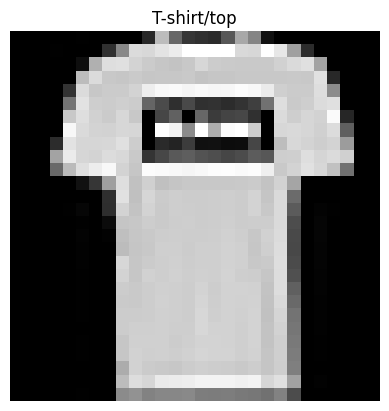

In [22]:
import matplotlib.pyplot as plt
image, label = train_data[1]
plt.imshow(image.squeeze(), cmap='grey')
plt.title(class_names[label])
plt.axis("off")

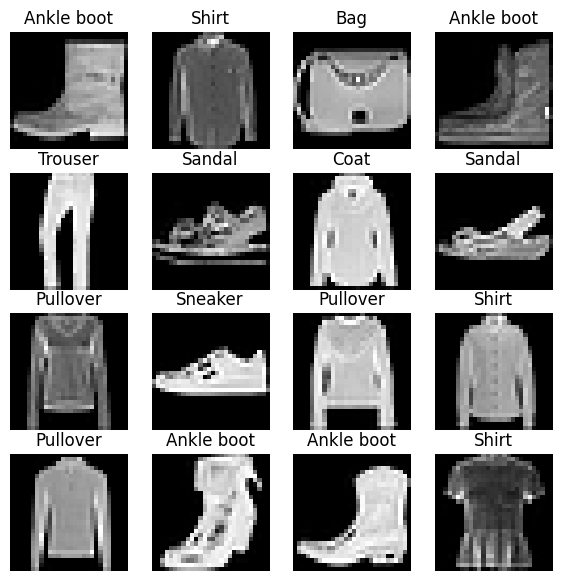

In [25]:
# plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(7,7))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  image, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(image.squeeze(), cmap='grey')
  plt.title(class_names[label])
  plt.axis("off")